In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb2fc97773383d5b6f1401f5059bf997


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | tocopilla
Processing Record 3 of Set 13 | nikolskoye
Processing Record 4 of Set 13 | cape town
Processing Record 5 of Set 13 | hilo
Processing Record 6 of Set 13 | strezhevoy
Processing Record 7 of Set 13 | saint george
Processing Record 8 of Set 13 | temaraia
City not found. Skipping...
Processing Record 9 of Set 13 | ushuaia
Processing Record 10 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 13 | porto novo
Processing Record 12 of Set 13 | barrow
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | isabela
Processing Record 15 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 13 | kidal
Processing Record 17 of Set 13 | khatanga
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | hasaki
Processing Record 20 of Set 13 | kwekwe
Processing Record 21 of S

Processing Record 31 of Set 16 | aykino
Processing Record 32 of Set 16 | malwan
City not found. Skipping...
Processing Record 33 of Set 16 | norman wells
Processing Record 34 of Set 16 | tuktoyaktuk
Processing Record 35 of Set 16 | juneau
Processing Record 36 of Set 16 | mehamn
Processing Record 37 of Set 16 | ulladulla
Processing Record 38 of Set 16 | toul
Processing Record 39 of Set 16 | el dorado
Processing Record 40 of Set 16 | dickinson
Processing Record 41 of Set 16 | georgetown
Processing Record 42 of Set 16 | manicore
Processing Record 43 of Set 16 | gandorhun
Processing Record 44 of Set 16 | jieshi
Processing Record 45 of Set 16 | sumbawa
City not found. Skipping...
Processing Record 46 of Set 16 | puli
Processing Record 47 of Set 16 | clyde river
Processing Record 48 of Set 16 | zhanatas
City not found. Skipping...
Processing Record 49 of Set 16 | vardo
Processing Record 50 of Set 16 | waupun
Processing Record 1 of Set 17 | xingyi
Processing Record 2 of Set 17 | angoche
Proce

Processing Record 19 of Set 20 | harnosand
Processing Record 20 of Set 20 | sao filipe
Processing Record 21 of Set 20 | qaqortoq
Processing Record 22 of Set 20 | batemans bay
Processing Record 23 of Set 20 | caravelas
Processing Record 24 of Set 20 | taurage
Processing Record 25 of Set 20 | alofi
Processing Record 26 of Set 20 | vaitupu
City not found. Skipping...
Processing Record 27 of Set 20 | ambilobe
Processing Record 28 of Set 20 | kudahuvadhoo
Processing Record 29 of Set 20 | bambous virieux
Processing Record 30 of Set 20 | anamur
Processing Record 31 of Set 20 | dumas
Processing Record 32 of Set 20 | kununurra
Processing Record 33 of Set 20 | that phanom
Processing Record 34 of Set 20 | kontagora
Processing Record 35 of Set 20 | oistins
Processing Record 36 of Set 20 | chama
Processing Record 37 of Set 20 | pajapan
Processing Record 38 of Set 20 | noumea
Processing Record 39 of Set 20 | yinchuan
Processing Record 40 of Set 20 | prince rupert
Processing Record 41 of Set 20 | tez

Processing Record 2 of Set 24 | barra do garcas
Processing Record 3 of Set 24 | cayenne
Processing Record 4 of Set 24 | omsukchan
Processing Record 5 of Set 24 | bone
Processing Record 6 of Set 24 | dera bugti
Processing Record 7 of Set 24 | ust-tsilma
Processing Record 8 of Set 24 | tawkar
City not found. Skipping...
Processing Record 9 of Set 24 | borgarnes
Processing Record 10 of Set 24 | samarai
Processing Record 11 of Set 24 | sirumugai
Processing Record 12 of Set 24 | leh
Processing Record 13 of Set 24 | gizo
Processing Record 14 of Set 24 | port stanley
Processing Record 15 of Set 24 | urumqi
Processing Record 16 of Set 24 | ellisras
Processing Record 17 of Set 24 | altamont
Processing Record 18 of Set 24 | inhambane
Processing Record 19 of Set 24 | karratha
Processing Record 20 of Set 24 | inuvik
Processing Record 21 of Set 24 | manggar
Processing Record 22 of Set 24 | tecamachalco
Processing Record 23 of Set 24 | agropoli
Processing Record 24 of Set 24 | dublin
Processing Reco

In [8]:
len(city_data)

577

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,68.00,88,75,8.05,TO,2020-08-01 15:53:40
1,Tocopilla,-22.09,-70.20,65.71,45,20,3.40,CL,2020-08-01 15:54:06
2,Nikolskoye,59.70,30.79,64.99,48,40,8.95,RU,2020-08-01 15:54:06
3,Cape Town,-33.93,18.42,69.01,49,0,4.70,ZA,2020-08-01 15:51:04
4,Hilo,19.73,-155.09,71.60,83,90,6.93,US,2020-08-01 15:52:25
5,Strezhevoy,60.73,77.59,68.00,68,40,8.95,RU,2020-08-01 15:54:07
6,Saint George,37.10,-113.58,91.99,23,1,3.36,US,2020-08-01 15:50:39
7,Ushuaia,-54.80,-68.30,41.00,93,40,4.18,AR,2020-08-01 15:52:41
8,Porto Novo,6.50,2.60,82.40,74,40,12.75,BJ,2020-08-01 15:54:07
9,Barrow,71.29,-156.79,32.00,84,90,6.93,US,2020-08-01 15:54:08


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-08-01 15:53:40,-21.20,-175.20,68.00,88,75,8.05
1,Tocopilla,CL,2020-08-01 15:54:06,-22.09,-70.20,65.71,45,20,3.40
2,Nikolskoye,RU,2020-08-01 15:54:06,59.70,30.79,64.99,48,40,8.95
3,Cape Town,ZA,2020-08-01 15:51:04,-33.93,18.42,69.01,49,0,4.70
4,Hilo,US,2020-08-01 15:52:25,19.73,-155.09,71.60,83,90,6.93


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time


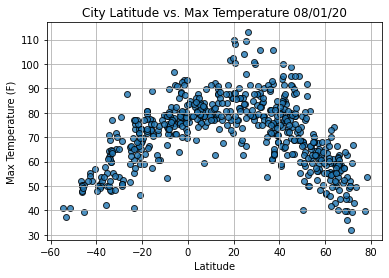

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

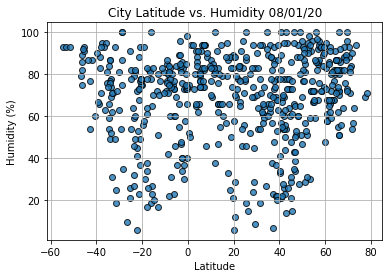

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

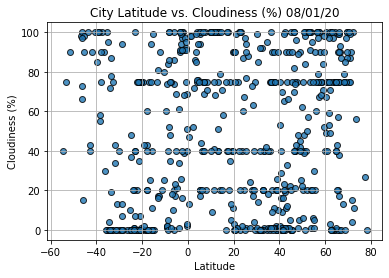

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

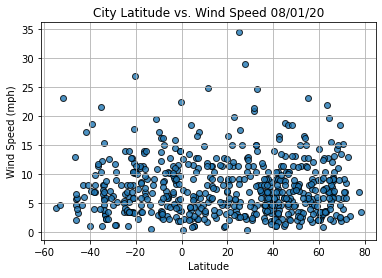

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()